**Iteration 3: Optimization**

Changes:
*   Addition of Batch Normalization
*   Learning Rate
*   Calculation of validation accuracy post each epoch

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


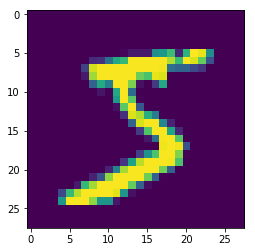

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization()) # change 1
model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization()) # change 1

model.add(Convolution2D(10, 1, 1, activation='relu')) # 12
model.add(MaxPooling2D(pool_size=(2, 2))) # 12

model.add(Convolution2D(16, 3, 3, activation='relu')) # 10
model.add(BatchNormalization()) # change 1
model.add(Convolution2D(20, 3, 3, activation='relu')) # 8
model.add(BatchNormalization()) # change 1

model.add(Convolution2D(12, 1, 1, activation='relu')) # 8

model.add(Convolution2D(16, 3, 3, activation='relu')) # 6
model.add(BatchNormalization()) # change 1
model.add(Convolution2D(20, 3, 3, activation='relu')) # 4
model.add(BatchNormalization()) # change 1


model.add(Convolution2D(10, 1, activation='relu')) #4
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)        170       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        1456      
__________

In [0]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.003), # change 2 
              metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test)) # change 3: validation data

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.1833 - acc: 0.9424 - val_loss: 0.0941 - val_acc: 0.9709
Epoch 2/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0659 - acc: 0.9804 - val_loss: 0.0751 - val_acc: 0.9766
Epoch 3/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0507 - acc: 0.9843 - val_loss: 0.0684 - val_acc: 0.9791
Epoch 4/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.0429 - acc: 0.9873 - val_loss: 0.0611 - val_acc: 0.9816
Epoch 5/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.0392 - acc: 0.9876 - val_loss: 0.0423 - val_acc: 0.9867
Epoch 6/20
60000/60000 [==============================] - 17s 284us/step - loss: 0.0334 - acc: 0.9893 - val_loss: 0.0458 - val_acc: 0.9859
Epoch 7/20
60000/60000 [==============================] - 18s 307us/step - loss: 0.0327 - acc: 0.9894 - val_loss: 0.

In [15]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test)) # change 3: validation data

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
  384/60000 [..............................] - ETA: 24s - loss: 0.0029 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 22s 364us/step - loss: 0.0142 - acc: 0.9956 - val_loss: 0.0407 - val_acc: 0.9893
Epoch 2/20
60000/60000 [==============================] - 20s 333us/step - loss: 0.0128 - acc: 0.9958 - val_loss: 0.0340 - val_acc: 0.9911
Epoch 3/20
60000/60000 [==============================] - 20s 334us/step - loss: 0.0142 - acc: 0.9951 - val_loss: 0.0400 - val_acc: 0.9894
Epoch 4/20
60000/60000 [==============================] - 20s 339us/step - loss: 0.0114 - acc: 0.9964 - val_loss: 0.0349 - val_acc: 0.9909
Epoch 5/20
60000/60000 [==============================] - 23s 387us/step - loss: 0.0122 - acc: 0.9961 - val_loss: 0.0324 - val_acc: 0.9902
Epoch 6/20
60000/60000 [==============================] - 28s 466us/step - loss: 0.0101 - acc: 0.9966 - val_loss: 0.0594 - val_acc: 0.9849
Epoch 7/20
60000/60000 [==============================] - 28s 473us/step - loss: 0.0105 - acc: 0.9966 - val_loss: 0.0417 - val_acc: 0.9897
Epoch 8/20
60000/60000 [==============

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [17]:
print(score)

[0.03285512605609133, 0.9928]


In [0]:
y_pred = model.predict(X_test)

In [19]:
print(y_pred[:9])
print(y_test[:9])

[[6.79099046e-21 4.19449127e-17 1.35496024e-11 3.91473520e-08
  2.58244294e-12 2.99710614e-14 1.43509203e-30 1.00000000e+00
  2.07828467e-18 1.92687732e-08]
 [1.14413058e-12 3.05412840e-13 1.00000000e+00 1.61214885e-18
  2.15983522e-13 8.96180814e-19 1.72765177e-10 8.30567090e-17
  2.61711056e-14 4.48780217e-20]
 [2.26432914e-10 1.00000000e+00 3.81604796e-13 1.78390081e-18
  3.50359158e-10 8.50171947e-11 7.98018526e-11 1.65063213e-10
  6.92229433e-12 6.74720779e-10]
 [1.00000000e+00 7.23337550e-16 1.01765211e-11 5.12036377e-13
  4.52043177e-12 1.05594223e-12 1.52561386e-09 1.90768993e-15
  5.17808344e-13 2.28401638e-11]
 [4.37711048e-19 2.99774754e-17 1.00578009e-16 4.35094107e-19
  1.00000000e+00 3.30746877e-13 2.52244358e-15 1.98736925e-18
  2.99541740e-16 5.71145229e-08]
 [5.07194620e-10 1.00000000e+00 2.45225037e-13 3.09130934e-20
  3.70344644e-10 5.85848210e-12 4.54295872e-11 3.95455141e-10
  3.01911252e-12 4.75722461e-10]
 [1.06379136e-24 8.31721358e-09 1.38380096e-09 1.00069116e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

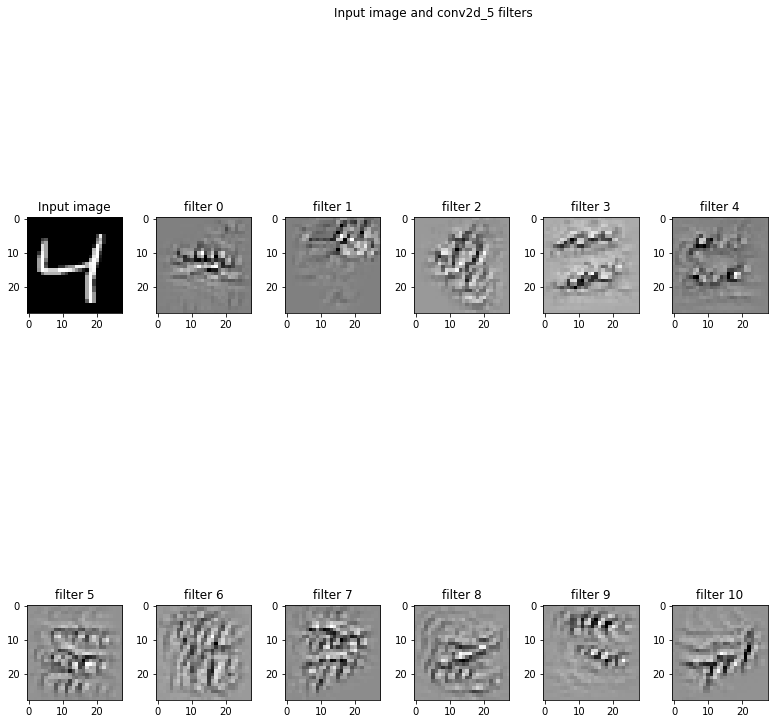

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_5'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()